In [1]:
import numpy as np
import utils
from scipy import signal 
import matplotlib.pyplot as plt

In [2]:
# load data
folder = "preprocessed_data/"
acc = np.load(folder + "karlebach_acc_norm.npy")

fs = 412

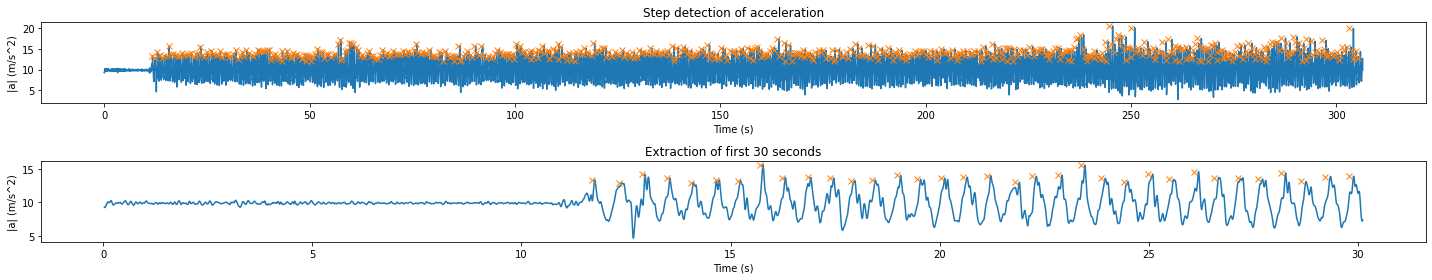

Number of peaks (steps):  632


In [17]:
#get first 30 secs
x = fs*30
height = 12
distance = 50

# find peaks
peaks, _ = signal.find_peaks(acc[1], height=height, distance=distance)
# extraction of signal for better plot
peaks_extraction, _ = signal.find_peaks(acc[1][0:x], height=height, distance=distance)

# plot signal & peaks
fig = plt.figure()
plt.subplot(2,1,1)
plt.title("Step detection of acceleration")
plt.plot(acc[0], acc[1])
plt.plot(peaks/fs, acc[1][peaks], "x")
plt.xlabel("Time (s)")
plt.ylabel("|a| (m/s^2)")
fig.set_figwidth(20)

plt.subplot(2,1,2)
plt.title("Extraction of first 30 seconds")
plt.plot(acc[0][0:x], acc[1][0:x])
plt.plot(peaks_extraction/fs, acc[1][0:x][peaks_extraction], "x")
plt.xlabel("Time (s)")
plt.ylabel("|a| (m/s^2)")
fig.set_figwidth(20)

plt.tight_layout()
plt.show()

print('Number of peaks (steps): ', len(peaks))